<a href="https://colab.research.google.com/github/zohir22s/Souyeh-Zouhir-ML-AutoML-Homework/blob/main/Souyeh_Zouhir_ML_AutoML_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning and AutoML homeWork
* **Name :** Souyeh Zouhir
* **Course :** Machine Learning
* **Tools used in this homework:** Scikit-learn, TPOT, Google Colab, kagglehub, numpy
## I.Objectif :
* Apply clustering to segment customers
* Build and evaluate classification models for fraud detection
* Discover and apply AutoML
* Comparing a manual approach with AutoML
* Use GitHub for versioning and sharing code

Ce notebook contient :
* Project 1: Customer segmentation
* Project 2: Fraud Detection
* A mini state of the art on AutoML
* The Application of AutoML on Project 2

# II. Project 1: Customer Segmentation


## 2.1 Load and Explore the dataset

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.cluster import KMeans, AgglomerativeClustering
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "shwetabh123/mall-customers",
    "Mall_Customers.csv"
)

df.head()
df.info()


Using Colab cache for faster access to the 'mall-customers' dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


2.2 Analysis of customer characteristics

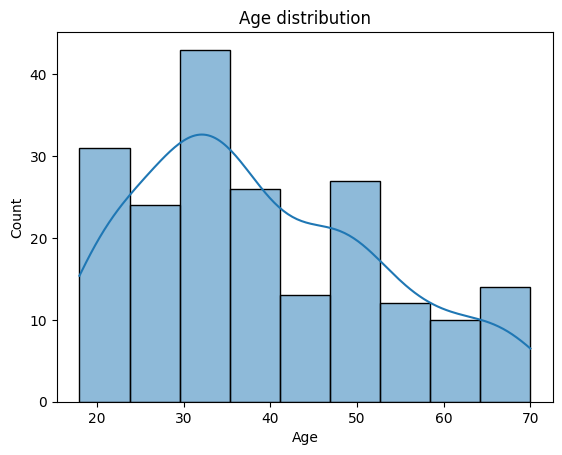

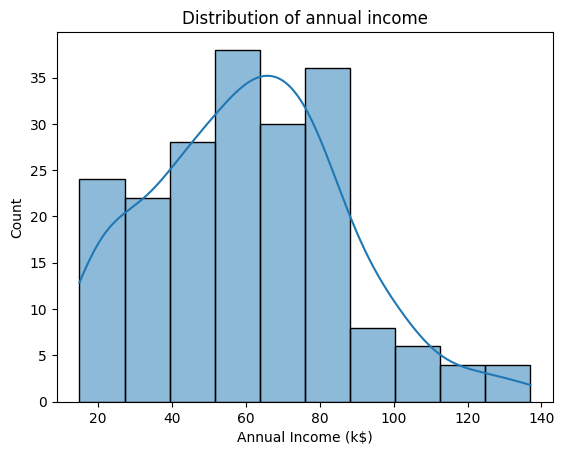

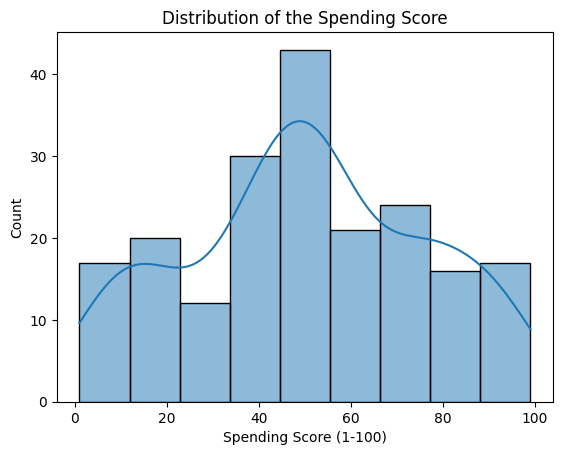

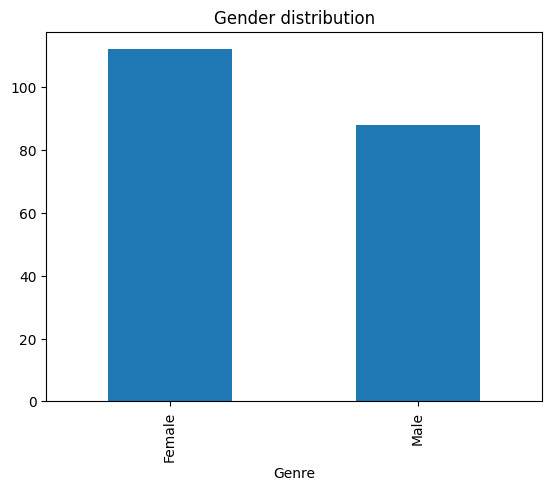

In [4]:
sns.histplot(df['Age'],kde=True)
plt.title("Age distribution")
plt.show()

sns.histplot(df['Annual Income (k$)'],kde=True)
plt.title("Distribution of annual income")
plt.show()

sns.histplot(df['Spending Score (1-100)'],kde=True)
plt.title("Distribution of the Spending Score")
plt.show()

df['Genre'].value_counts().plot(kind='bar', title="Gender distribution")
plt.show()

## 2.3 Clustering - K-Means

In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5 ,random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

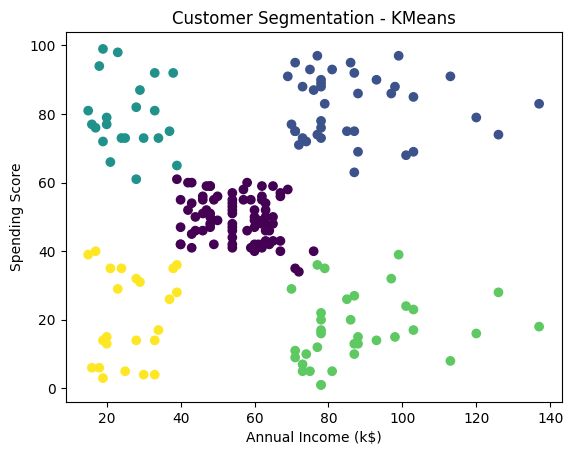

In [6]:
plt.scatter(   df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['KMeans_Cluster'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation - KMeans")
plt.show()

## 2.4 Clustering - Agglomeratif

In [7]:
agg = AgglomerativeClustering(n_clusters=5)
df['Agg_Cluster'] = agg.fit_predict(X)

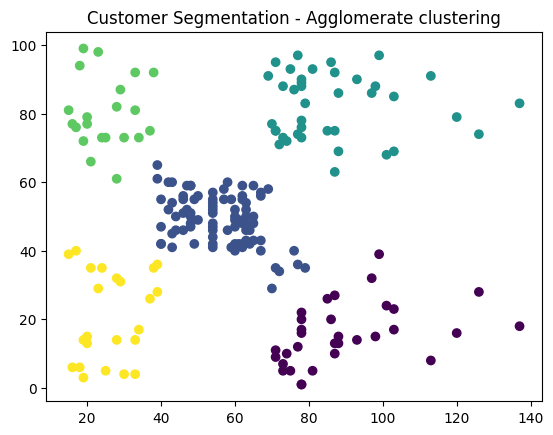

In [8]:
plt.scatter(   df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Agg_Cluster'])
plt.title("Customer Segmentation - Agglomerate clustering")
plt.show()

## 2.5 Advanced Visualisation

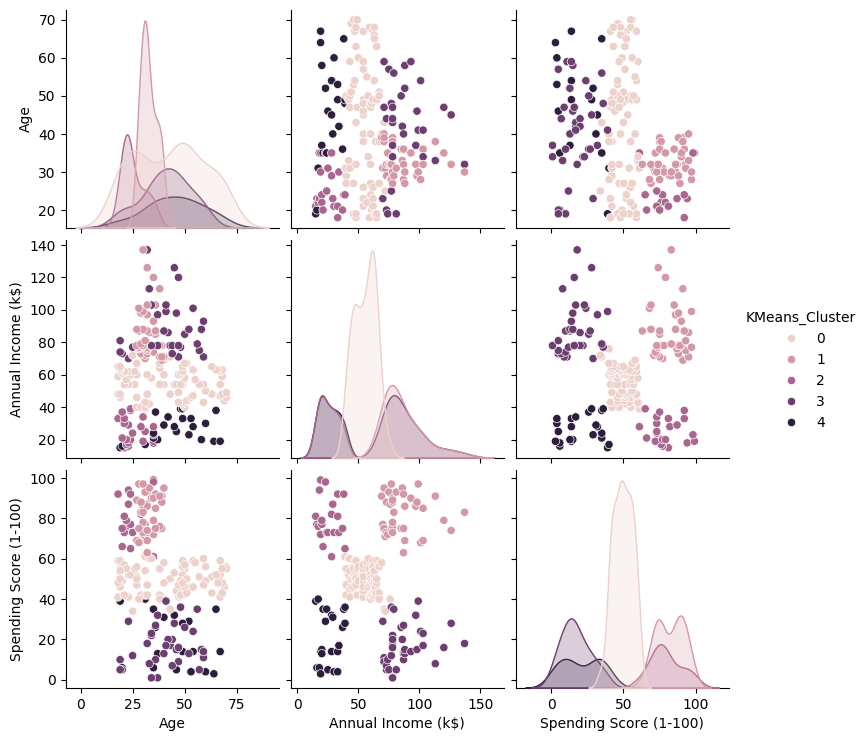

In [9]:
sns.pairplot(
    df,
    vars=['Age','Annual Income (k$)',
          'Spending Score (1-100)'],
    hue='KMeans_Cluster'
)
plt.show()

## 2.6 Interpretation and recommendation
- High-Income, High-Scoring Customers (Premium Customers): Keep them happy with loyalty programs, special offers, and personalized messages.
- High Income, Low Score (Potential Customers): Try to engage them more with promotions, upselling, and awareness campaigns.
- Medium Income, Medium Spending (Regular Customers): Encourage them to keep buying with discounts, bundles, or loyalty points.
- Low Income, High Spending (Impulse Customers): Push limited-time offers or promotions to boost their purchases.
- Low Income, Low Spending (Low Priority): Don’t spend too much on marketing here; stick to cost-effective ways or basic retention strategies.



# III. Project 2: Credit Card Fraud Detection

#* Incomplete*




## 3.1 Loading the database

In [17]:
df_fraud = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "mlg-ulb/creditcardfraud",
    "creditcard.csv"
)
df_fraud.head()

Using Colab cache for faster access to the 'creditcardfraud' dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 3.2 Imbalance analysis

In [14]:
df_fraud['Class'].value_counts()

,count
Class,
0,284315
1,492


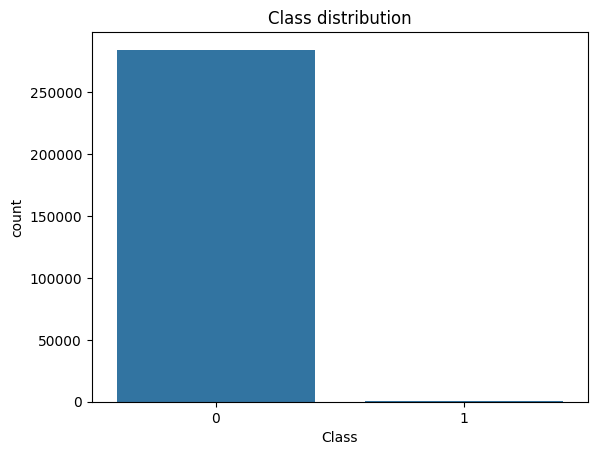

In [16]:
sns.countplot(x='Class',data= df_fraud)
plt.title("Class distribution")
plt.show()

## 3.3 Data Preparation

## 3.4 Classification Model

# III. AutoML – State of the Art
## What is AutoML ?

## Why is it used ?

## AutoML FrameWorks used in this project :
### TPOT (Tree-based Pipeline Optimization Tool)
**Fonctionnement**  

**Advantages**

**Limites**

### Auto-sklearn
**Fonctionnement**  

**Advantages**

**Limites**


# IV. AutoML Applied to Fraud Detection
